In [248]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



# HR Analysis Case Study


# Основная информация

В этом наборе данных представлены сведения о работниках некоторой компании. Для каждого сотрудника указано:
- id - его идентификатор
- department - отдел
- region - регион
- education - ступень образования
- gender - пол
- recruitment_channel - канал найма
- no_of_trainings - количество пройденных тренингов
- age -  возраст
- previous_year rating - рейтинг сотрудника за прошлый год
- length_of_service - стаж работы
- KPIs_met > 80 % - ключевые показатели эффективности выше 80 % ? 
- awards_won ? - выигрывал ли награды?
- avg_training_score - средний балл на тренингах 
- is_promoted - был ли повышен в должности?

Задача: построить модель, предсказывающую на основе текущих данных, был ли он повышен в должности. 

In [18]:
data = pd.read_csv('train.csv')
data.shape

(54808, 14)

In [19]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [20]:
data.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [21]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [23]:
data.index

RangeIndex(start=0, stop=54808, step=1)

## 1. Характиристики для всех числовых признаков

In [24]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


## 2. Xарактиристики для всех категориальных признаков.

In [25]:
data.describe(include=['object'])

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


# Визуализация данных

In [26]:
sns.set(style = 'white', rc={'figure.figsize':(10, 6)})

## 1. Половозрастной состав компании.

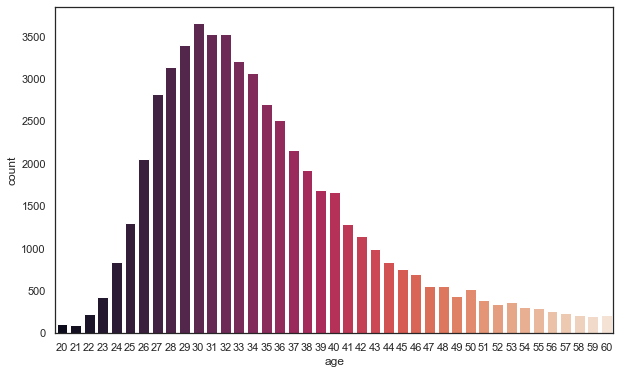

In [27]:
sns.countplot(x='age', data=data, palette ='rocket')
pass

Все возраста сотрудников находятся в пределах от 20 до 60 лет, включительно.

In [54]:
data['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

In [55]:
 data['gender'].unique().tolist()

['f', 'm']

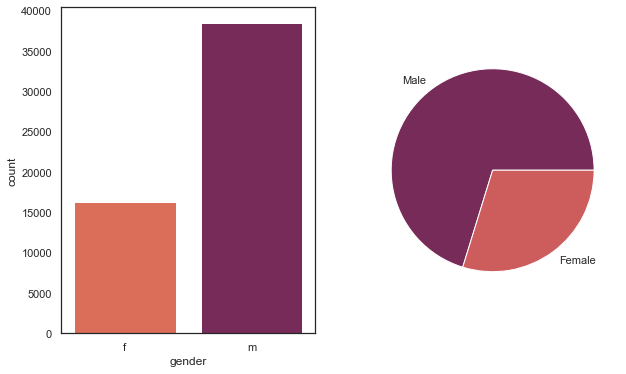

In [56]:
fig, ax =plt.subplots(1,2)
sns.countplot(x='gender', data=data, palette="rocket_r", ax=ax[0])
plt.pie(data['gender'].value_counts(), labels = ['Male', 'Female'], colors = [(119/255,43/255,88/255), 'indianred'])
pass

Сотрудников-мужчин почти в 2.4 раза больше, чем сотрудников-женщин.

## 2. Уровень образования сотрудников

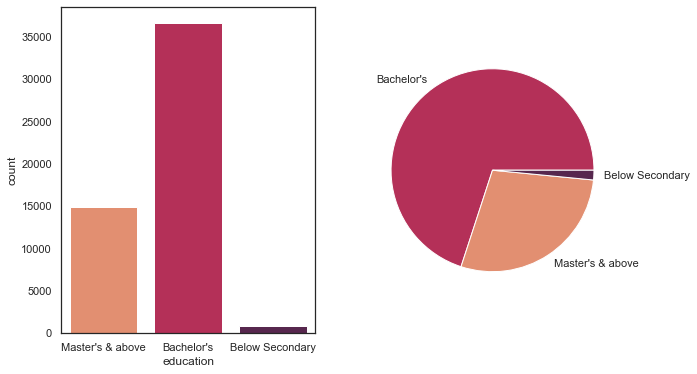

In [57]:
fig, ax =plt.subplots(1,2)
sns.countplot(x='education', data=data,  palette="rocket_r", ax = ax[0])
plt.pie(data['education'].value_counts(), labels = ["Bachelor's", "Master's & above",'Below Secondary'], colors = [(180/255, 48/255, 88/255), (226/255, 143/255, 113/255), (87/255, 39/255, 78/255)])
pass

Подавляющее большинство сотрудников имеет высшее образование, из них больше всего имеют звания бакалавров.

In [92]:
data['education'].unique().tolist()

["Master's & above", "Bachelor's", nan, 'Below Secondary']

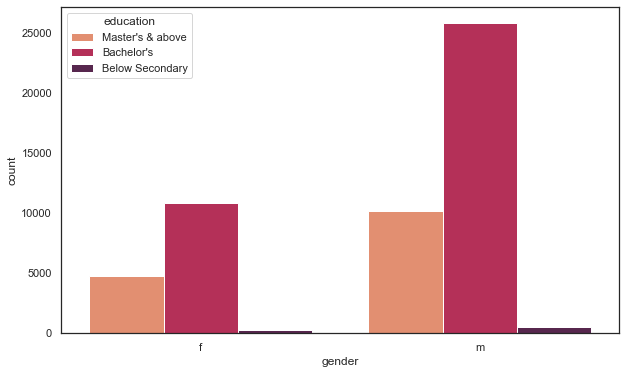

In [93]:
sns.countplot(x='gender', hue = 'education', data=data, palette="rocket_r")
pass

Для женщин и мужчин распредление уровней образования почти одинаковое (с поправкой на количество тех и других)

Найдем самого часто встрещающегося сотрудника в компании:

In [94]:
data[['department','gender','education', 'age']].mode()

,department,gender,education,age
0,Sales & Marketing,m,Bachelor's,30


Им оказался мужчина 30 лет, со степенью бакалавра, работающий в отделе продаж и маркетинга.

## 3. Диаграмма занятости по отраслям

In [95]:
data['department'].nunique()

9

В компаннии 9 различных департаментов.

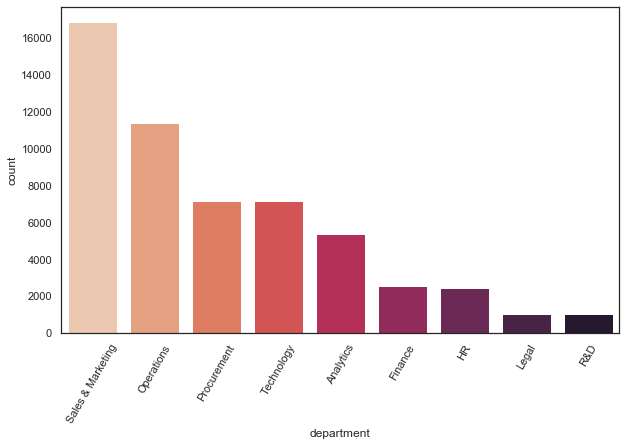

In [96]:
sns.countplot(x='department', order=data['department'].value_counts().index,  data=data, palette = 'rocket_r')
plt.xticks(rotation = 60)
pass

Наибольшее число сотрудников компании занято в продажах и маркетинге. Следующий за ним по численности отдел - управления операциями (операционный менеджмемнт) - отдел отвечающий за контроль эффективности производства и товаров и услуг. 
Самыми немногочисленными отделами же являются юридический и исследования и разработки. 

Посмотрим на распределение женщин и мужчин в каждом отделе:

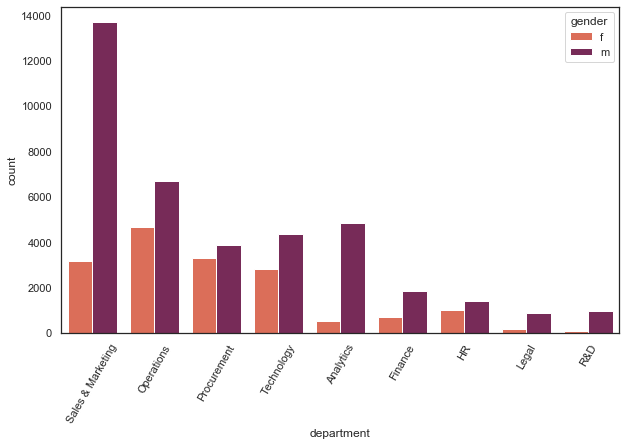

In [97]:
sns.countplot(x='department', order=data['department'].value_counts().index, hue ='gender', palette = 'rocket_r', data=data)
plt.xticks(rotation = 60)
pass

In [98]:
data[data['department'] == 'R&D']['gender'].value_counts()
print('Женщин в отделе R&D\n', data[data['department'] == 'R&D']['gender'].value_counts())

Женщин в отделе R&D
 m    942
f     57
Name: gender, dtype: int64


За счет большего количества мужчин в компании, в каждом отделе преобладают сотрудники мужчины. В отделе закупок и службе HR количество женщин приближается к количеству мужчин. В юридическом и R&D женщины почти отсутствуют.

### Распределение сотрудников с разным уровнем образования по отраслям

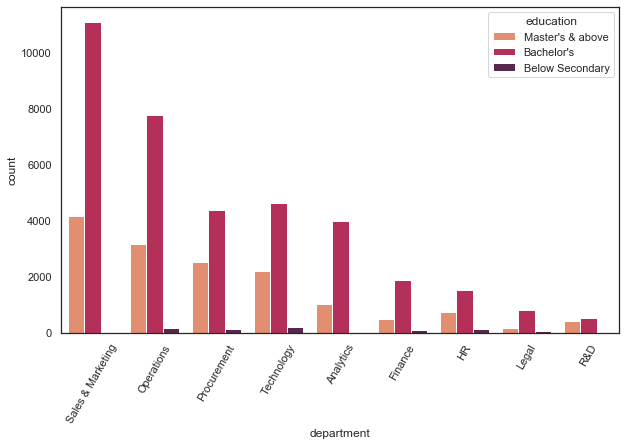

In [99]:
sns.countplot(x='department', order=data['department'].value_counts().index, hue ='education', palette = 'rocket_r', data=data)
plt.xticks(rotation = 60)
pass

In [100]:
data[(data['department'] == 'R&D')]['education'].value_counts()

Bachelor's          542
Master's & above    429
Name: education, dtype: int64

В отделе R&D отсутвуют люди без высшего образования

### Распределение возрастов сотрудников по отраслям

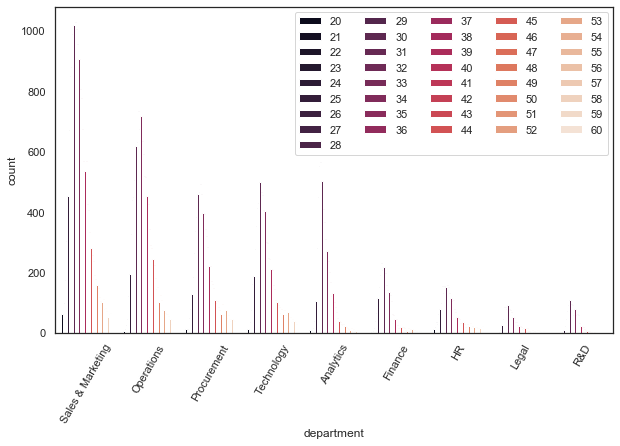

In [101]:
sns.countplot(x='department', order=data['department'].value_counts().index, hue = 'age', palette="rocket", data=data)
plt.legend(ncol=5, loc='upper right')
plt.xticks(rotation = 60)
pass

В каждом отделе преобладает число сотрудников среднего возраста. 

Найдем медианы и моды возрастов по отделам.

In [102]:
data['age'].mean()

34.80391548679025

In [103]:
data[['department', 'age']].mode()

,department,age
0,Sales & Marketing,30


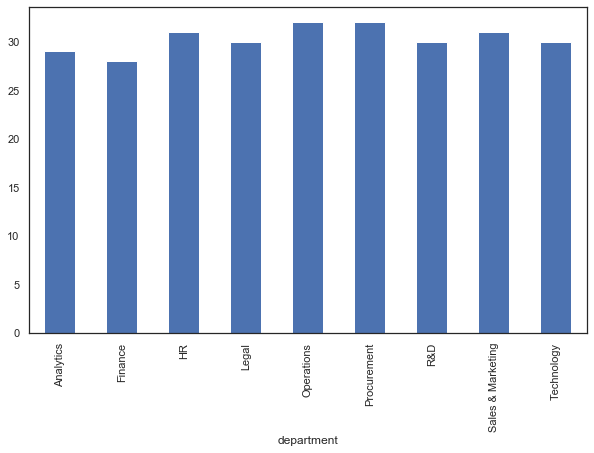

In [104]:
data.groupby('department')['age'].agg(pd.Series.mode).plot.bar()
pass

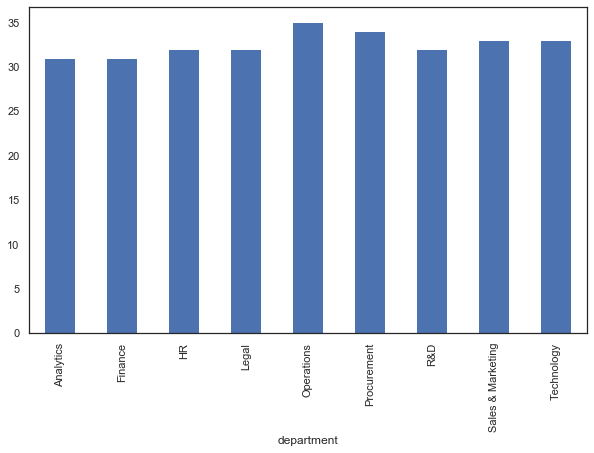

In [105]:
data.groupby('department')['age'].agg(pd.Series.median).plot.bar()
pass

В "среднем" старше всех сотрудники в отделе Operations

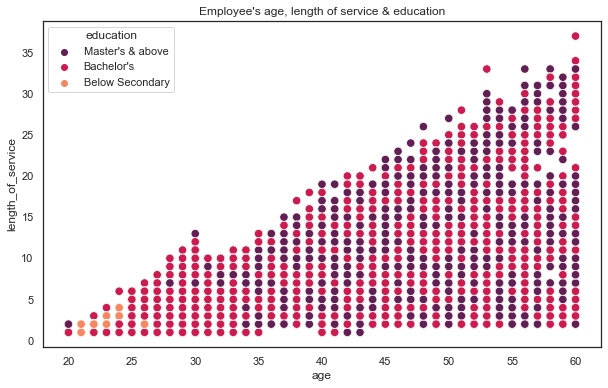

In [106]:
# adding a matplotlib parameters to seaborn functions
sns.scatterplot(data=data, x='age', y='length_of_service',  hue='education', palette ='rocket', s=70) 
plt.title("Employee's age, length of service & education")
pass

Очевидно, присутствует зависимость между возрастом и стажем работы.

На графике ниже можно увидеть, что люди без высшего образования в основном младше 30 лет.

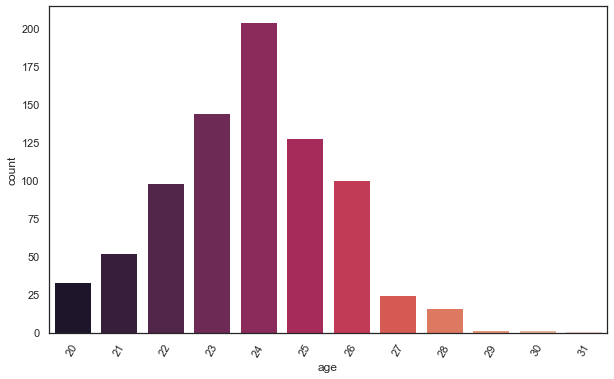

In [107]:
tmp = data[data['education'] == 'Below Secondary']
sns.countplot(x = 'age',  palette="rocket", data=tmp)
plt.xticks(rotation = 60)
pass

## 4. Занятость по регионам

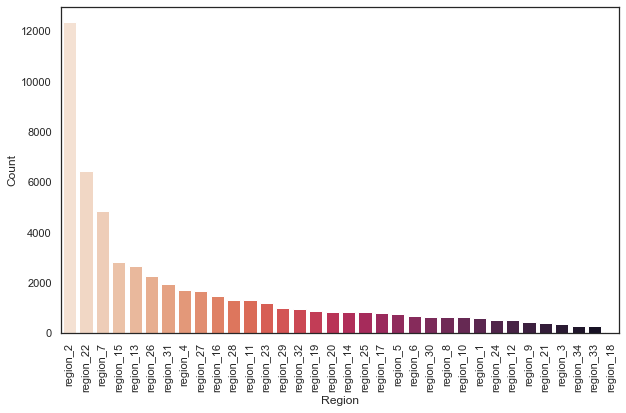

In [108]:
sns.countplot(x = data['region'], order=data['region'].value_counts().index, palette ='rocket_r')
plt.xticks(rotation = 90)
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

In [120]:
data['region'].nunique()

34

In [109]:
data['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

Примерно четверть всех сотрудников компании работают в регионе №2.

## 5. Диаграммы рассеивания для каждой пары переменных

c:\program files\python36\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\program files\python36\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


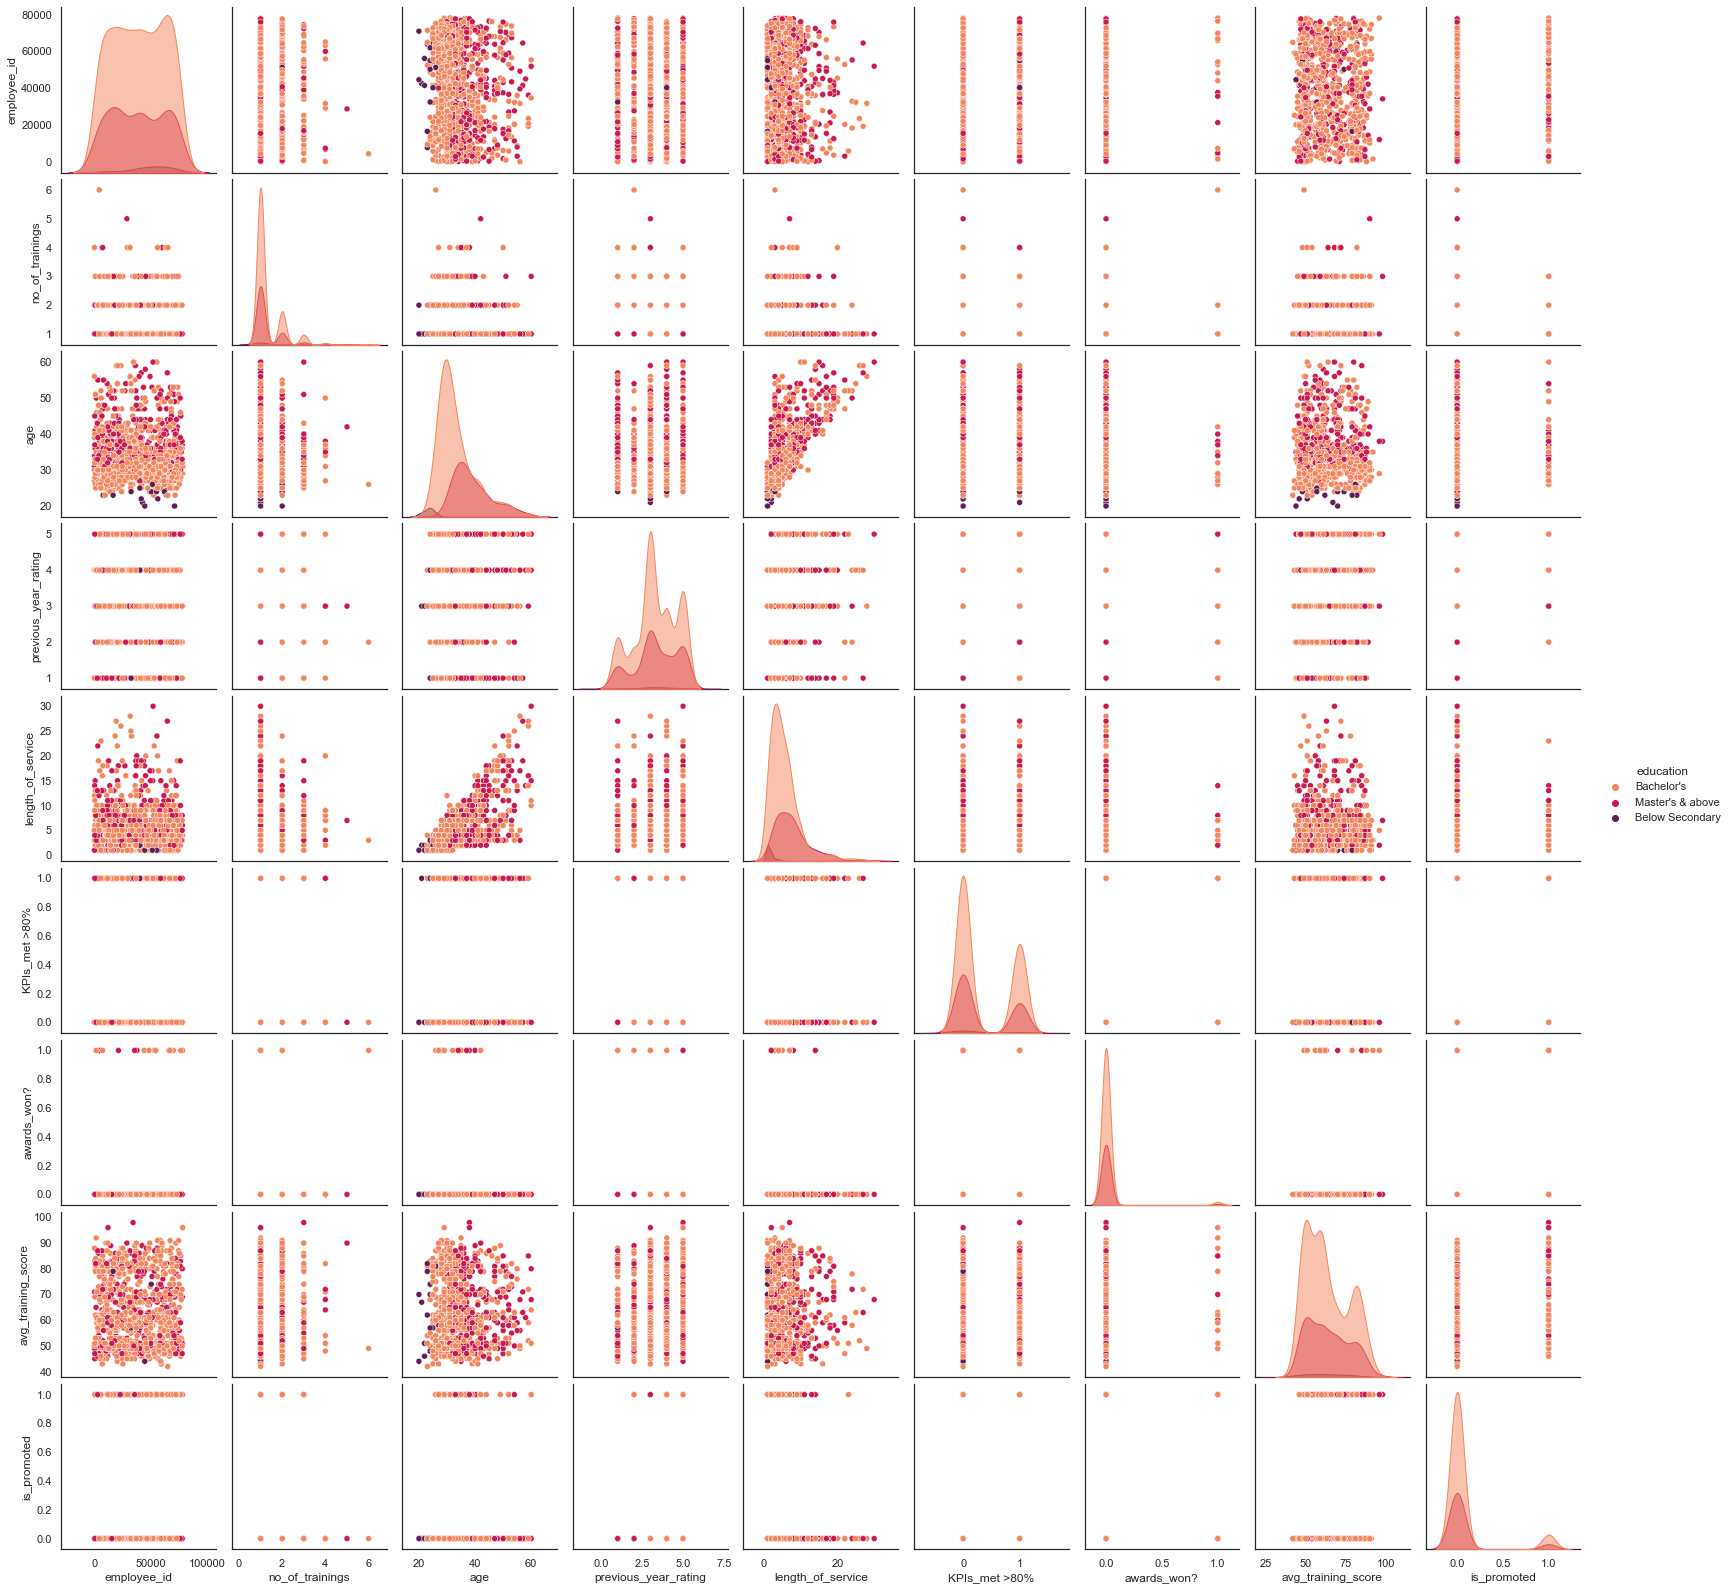

In [110]:
np.random.seed(31)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace = False)
sns.pairplot(data.iloc[random_subset], diag_kind = 'auto', hue='education', diag_kws={'alpha':0.5}, palette = 'rocket_r')
#plt.xlabel('n, elements', fontsize=20)
#plt.ylabel('t, ms', fontsize=20)
#plt.legend(['raw data', 'fit'], fontsize=20)
pass

#### Графики распределения для каждого числового признака

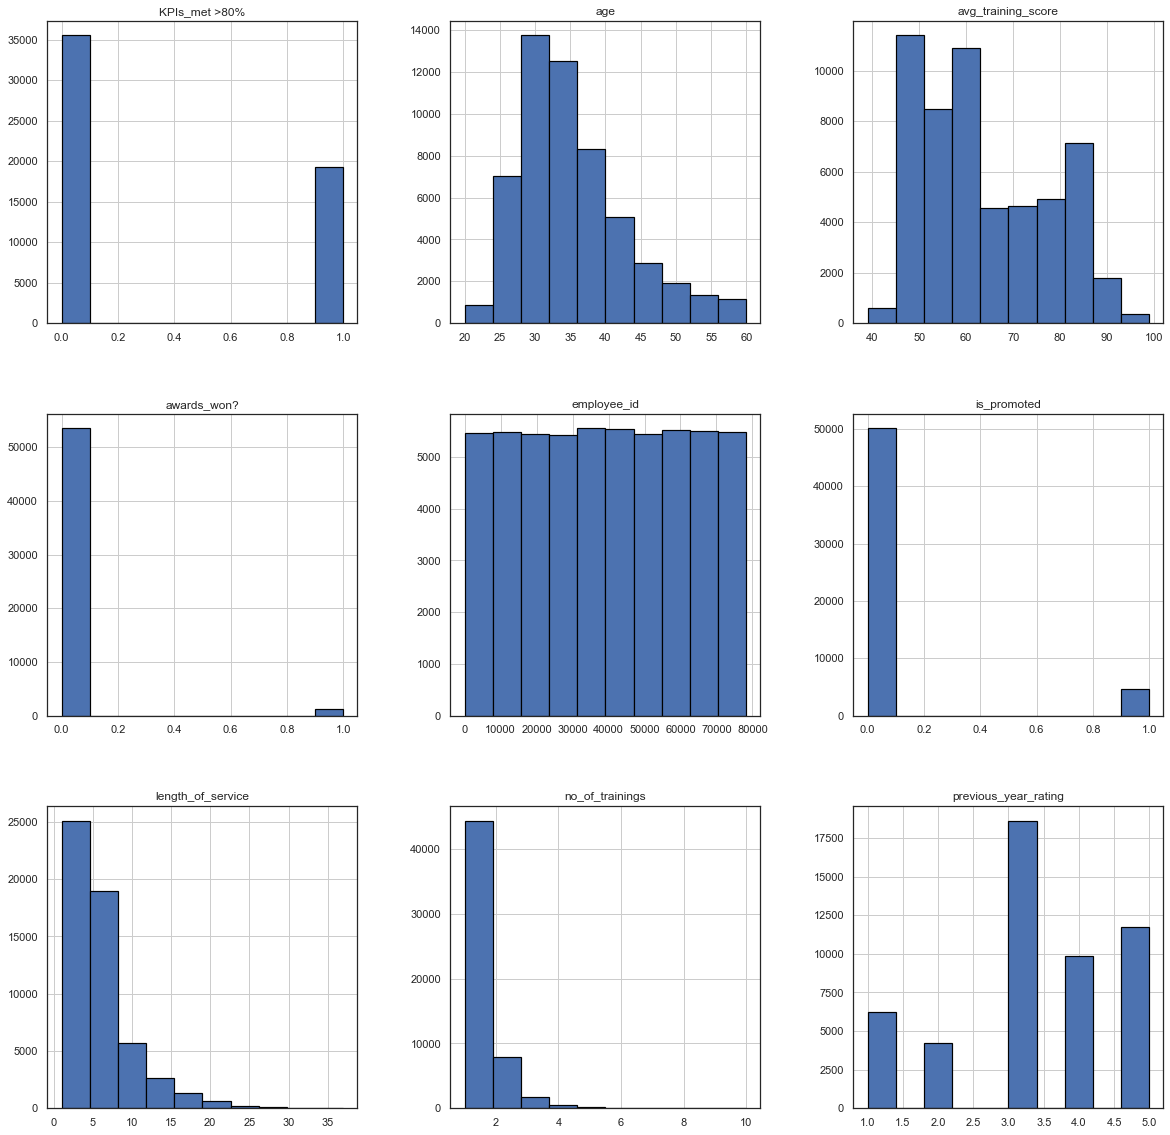

In [111]:
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [112]:
data['length_of_service'].value_counts(bins=4)

(0.963, 10.0]    48922
(10.0, 19.0]      5240
(19.0, 28.0]       560
(28.0, 37.0]        86
Name: length_of_service, dtype: int64

In [113]:
data['no_of_trainings'].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64

Из этих графиков видно, что:
- Примерно две трети сотрудников имеют ключевые показтели производительности (KPI) ниже  80%
- Абсолютное большинство сотрудников никогда не выигрывали награды
- Стаж работы в компании у большинства (48922) до 10 лет, что достаточно легко объясняется возрастом среднего работника (30 лет)
- Всего 646 сотрудников имеют стаж больше 19 лет
- Большинство сотрудников ( > 40000) прошли только один тренинг.

Рассмотрим следующие гистрограммы и сделаем предположения о распределениях:

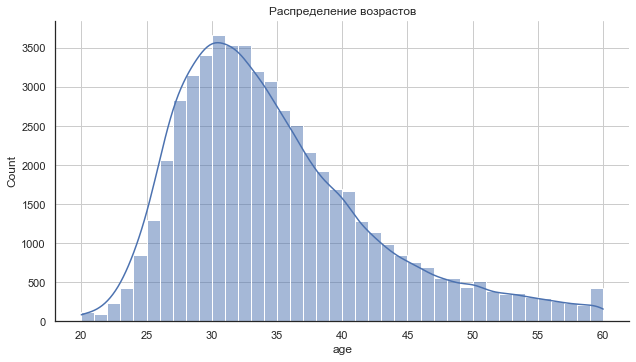

In [114]:
sns.displot(data['age'], bins=40, kde = True, aspect = 1.8)
plt.grid()
plt.title('Распределение возрастов')
pass

Распределение возрастов визуально похоже на гамма распределение.

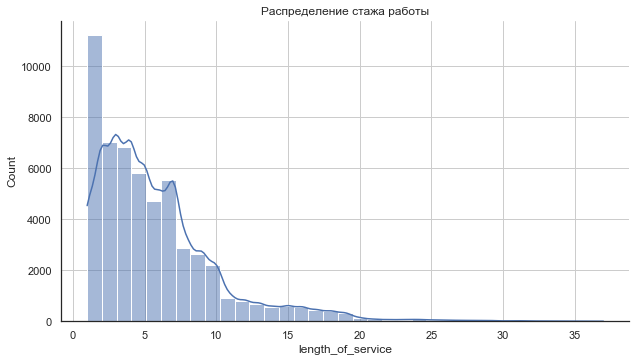

In [115]:
sns.displot(data['length_of_service'], bins=35, kde = True, aspect = 1.8)
plt.grid()
plt.title('Распределение стажа работы')
pass

Распределение для количества сотрудников с разным стажем работы напоминает экспоненциальное распределение.

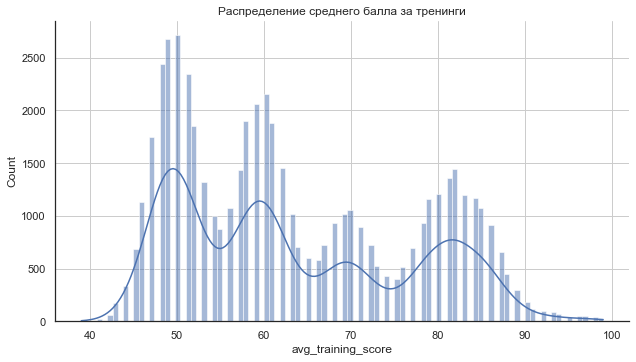

In [116]:
sns.displot(data['avg_training_score'], bins=100, kde = True, aspect = 1.8)
plt.grid()
plt.title('Распределение среднего балла за тренинги')
pass

Cредний балл за тренинги обладает мультимодальным распределением.

## 6. Корреляционная матрица

In [117]:
corr_mat = data.corr()
corr_mat

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


In [118]:
corr_mat > 0.5

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,True,False,False,False,False,False,False,False,False
no_of_trainings,False,True,False,False,False,False,False,False,False
age,False,False,True,False,True,False,False,False,False
previous_year_rating,False,False,False,True,False,False,False,False,False
length_of_service,False,False,True,False,True,False,False,False,False
KPIs_met >80%,False,False,False,False,False,True,False,False,False
awards_won?,False,False,False,False,False,False,True,False,False
avg_training_score,False,False,False,False,False,False,False,True,False
is_promoted,False,False,False,False,False,False,False,False,True


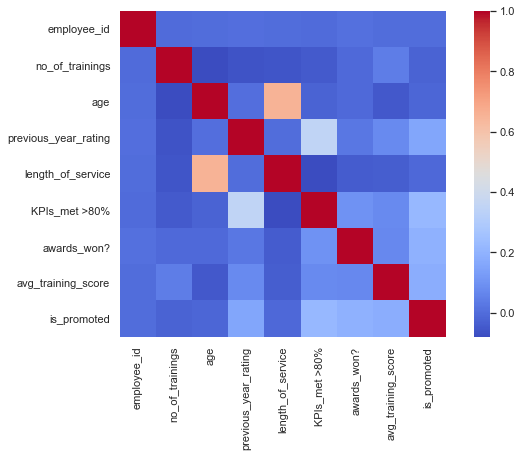

In [119]:
sns.heatmap(data.corr(), square=True, cmap='coolwarm')
pass

Ожидаемо присутствует корреляция между стажем работы и возрастом. Между остальными признаками явной корреляции не наблюдается. 

## 7. Связь разных характеристик и повышения в должности


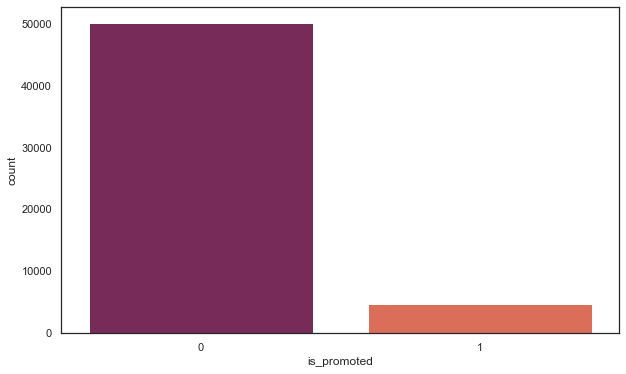

In [29]:
sns.countplot(x='is_promoted', palette = 'rocket', data = data)
pass

In [30]:
data['is_promoted'].value_counts(normalize=True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

Только 8.52 % сотрудников из всей выборки получили повышение в компании.

### Возраст и повышение

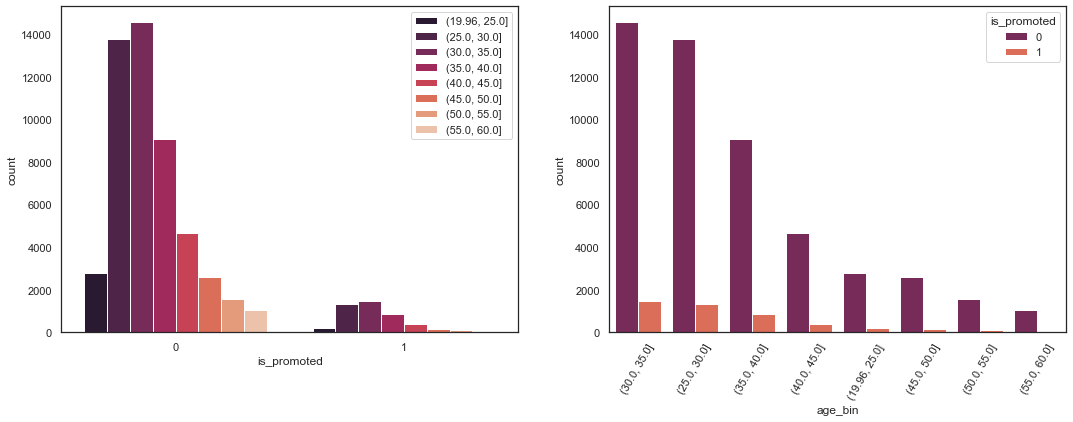

In [74]:
num_bins = 8
data['age_bin'] = pd.cut(data['age'], bins = num_bins)

fig, ax = plt.subplots(1,2, figsize=(18,6))
sns.countplot(x='is_promoted', hue = 'age_bin', palette = 'rocket', data = data, ax=ax[0])
ax[0].legend(ncol=1, loc='upper right')

sns.countplot(x='age_bin', order=data['age_bin'].value_counts().index, hue = 'is_promoted', palette = 'rocket', data = data)
plt.xticks(rotation = 60)
pass

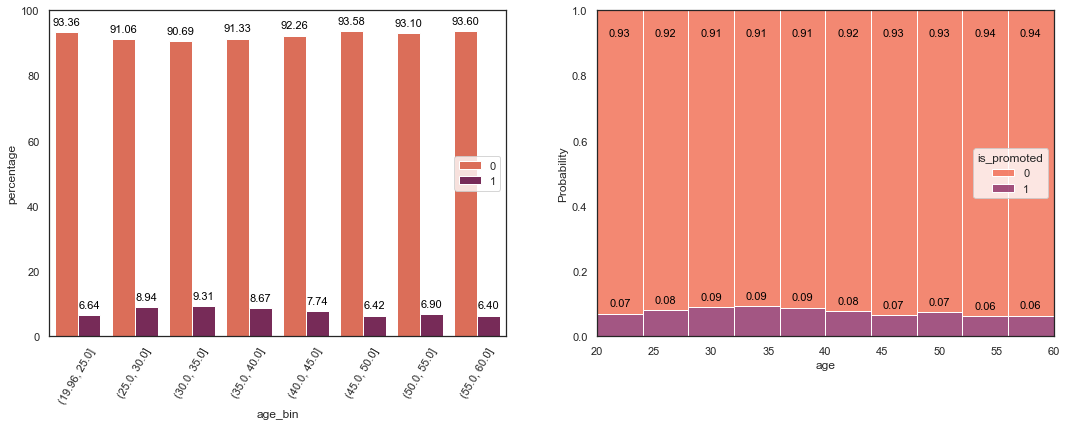

In [95]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)
    
fig, ax = plt.subplots(1,2, figsize=(18,6))
percentage = (data.groupby(['age_bin'])['is_promoted']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('is_promoted'))
ax[0] = sns.barplot(x="age_bin", y="percentage", hue="is_promoted", data=percentage, palette = 'rocket_r',ax = ax[0])
ax[0].set_ylim(0,100)
for p in ax[0].patches:
    ax[0].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
    textcoords='offset points')
ax[0].tick_params(axis='x', rotation = 60)
ax[0].legend(ncol=1, loc='center right')

ax[1] = sns.histplot(x='age', bins = num_bins, stat="probability", hue = 'is_promoted', data = data, multiple = 'fill', palette = 'rocket_r') #discrete=True)
i = 0
for p in ax[1].patches:
    ax[1].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()) if i < num_bins else (p.get_x() + p.get_width() / 2., 0.9),
    ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
    textcoords='offset points')
    i +=1
move_legend(ax[1], "center right")


pass

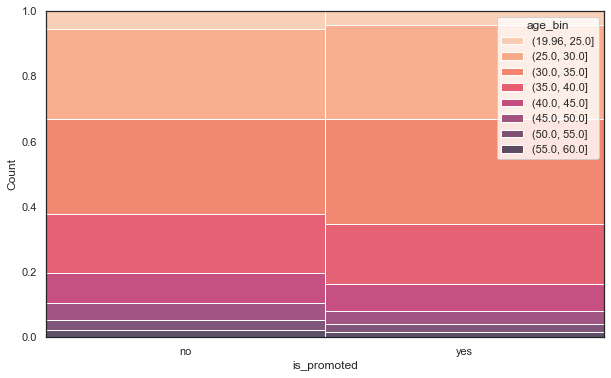

In [76]:
sns.histplot(x='is_promoted', hue = 'age_bin', data = data, multiple = 'fill', palette = 'rocket_r', discrete=True)
plt.xticks([0,1], ['no', 'yes'])
pass

Вероятность повышения растет с возрастом до некоторого момента, а затем уменьшается

### Стаж работы и повышение

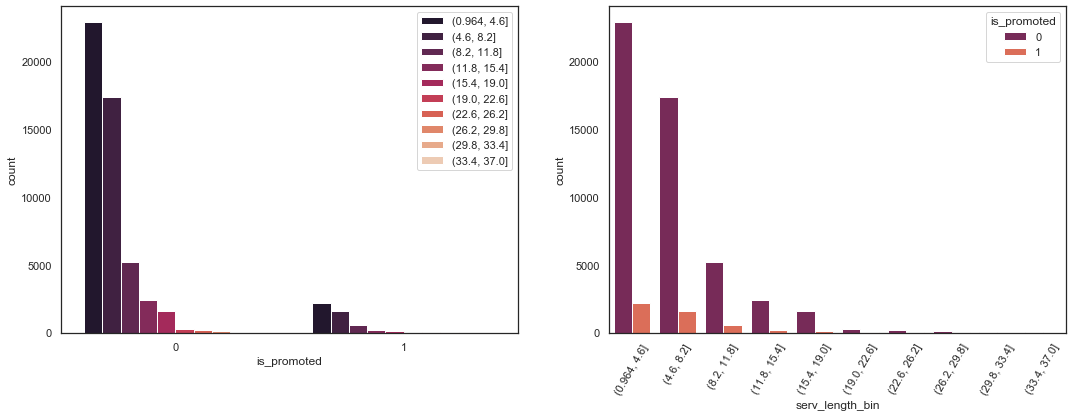

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

num_bins = 10
data['serv_length_bin'] = pd.cut(data['length_of_service'], bins=num_bins)
sns.countplot(x='is_promoted', hue = 'serv_length_bin', palette = 'rocket', data = data, ax = ax[0])
ax[0].legend(ncol=1, loc='upper right')

sns.countplot(x='serv_length_bin', order=data['serv_length_bin'].value_counts().index, hue = 'is_promoted', palette = 'rocket', data = data)
plt.xticks(rotation = 60)

pass

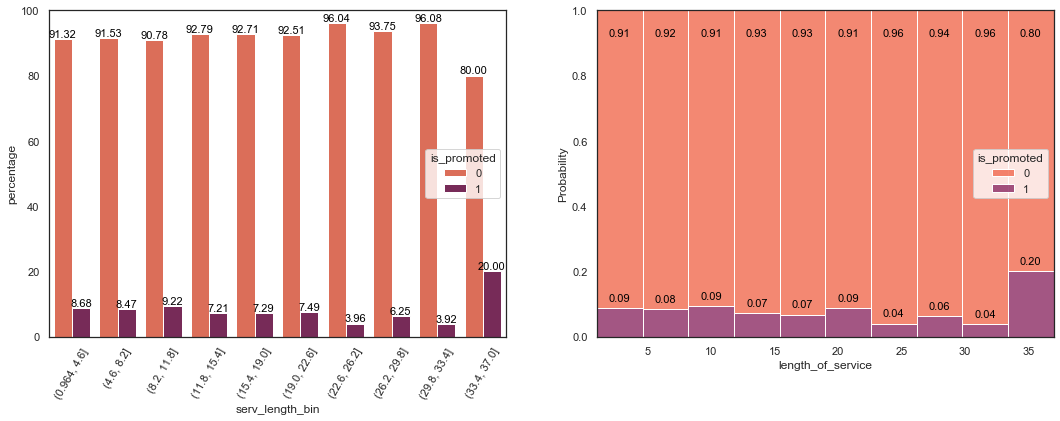

In [96]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
percentage = (data.groupby(['serv_length_bin'])['is_promoted']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('is_promoted'))
ax[0] = sns.barplot(x="serv_length_bin", y="percentage", hue="is_promoted", data=percentage, palette = 'rocket_r', ax = ax[0])
ax[0].set_ylim(0,100)
for p in ax[0].patches:
    ax[0].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
    textcoords='offset points')
ax[0].tick_params(axis = 'x', rotation = 60)
move_legend(ax[0], "center right")

ax[1] = sns.histplot(x='length_of_service', bins = num_bins, stat="probability", hue = 'is_promoted', data = data, multiple = 'fill', palette = 'rocket_r') #discrete=True)
i = 0
for p in ax[1].patches:
    ax[1] .annotate("%.2f" % p.get_height(),  (p.get_x() + p.get_width() / 2., p.get_height()) if i < num_bins else (p.get_x() + p.get_width() / 2., 0.9),
    ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
    textcoords='offset points')
    i += 1
move_legend(ax[1], "center right")    
pass

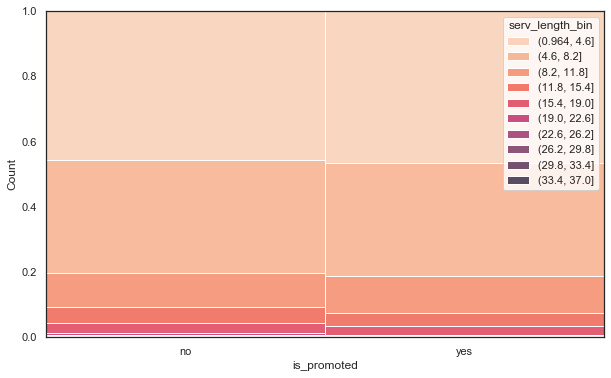

In [82]:
sns.histplot(x='is_promoted', hue = 'serv_length_bin', data = data, multiple = 'fill', palette = 'rocket_r', discrete=True)
plt.xticks([0,1], ['no', 'yes'])
pass

### Регион и повышение

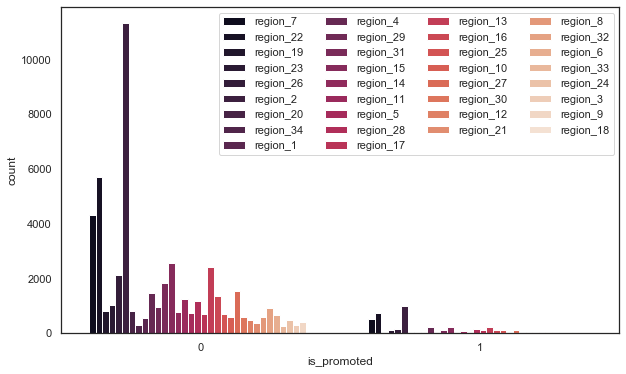

In [62]:
sns.countplot(x='is_promoted', hue = 'region', palette = 'rocket', data = data)
plt.legend(ncol=4, loc='upper right')
pass

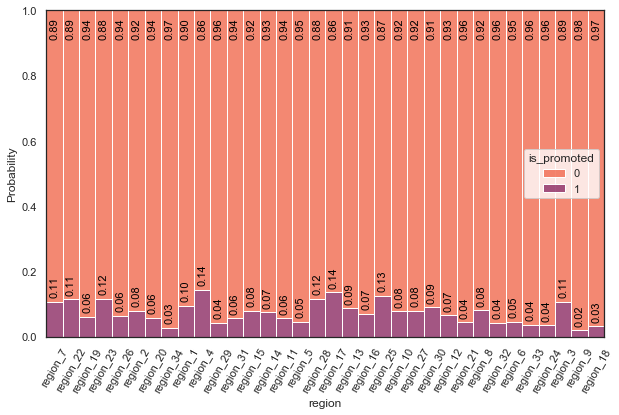

In [98]:
nregions = data['region'].nunique()

ax = sns.histplot(x='region', bins = num_bins, stat="probability", hue = 'is_promoted', data = data, multiple = 'fill', palette = 'rocket_r') #discrete=True)
i = 0
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()) if i < nregions else (p.get_x() + p.get_width() / 2., 0.9),
    ha='center', va='center', fontsize=11, color='black', xytext=(0, 15),
    textcoords='offset points', rotation = 90)
    i += 1
plt.xticks(rotation = 60)
move_legend(ax, "center right")

pass

### Отдел и повышение

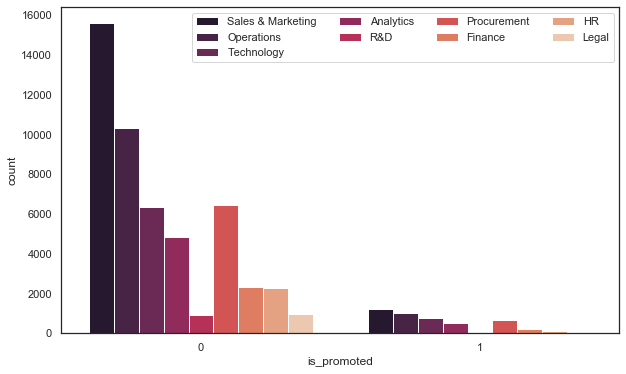

In [63]:
sns.countplot(x='is_promoted', hue = 'department', palette = 'rocket', data = data)
plt.legend(ncol=4, loc='upper right')
pass

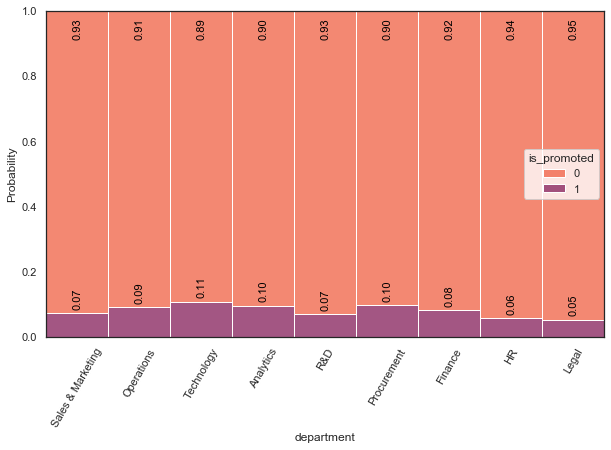

In [99]:
ndep = data['department'].nunique()
ax = sns.histplot(x='department', bins = num_bins, stat="probability", hue = 'is_promoted', data = data, multiple = 'fill', palette = 'rocket_r') #discrete=True)
#ax.legend(loc="center right")
i = 0
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()) if i < ndep  else (p.get_x() + p.get_width() / 2., 0.9),
    ha='center', va='center', fontsize=11, color='black', xytext=(0, 15),
    textcoords='offset points', rotation = 90)
    i += 1
plt.xticks(rotation = 60)
move_legend(ax, "center right")
pass

### Уровень образования и повышение

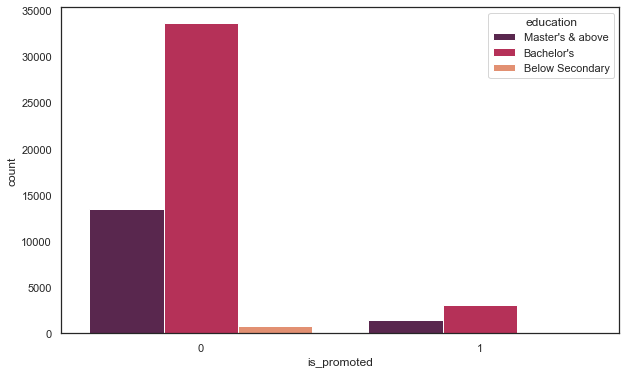

In [123]:
sns.countplot(x='is_promoted', hue = 'education', palette = 'rocket', data = data)
pass

In [108]:
print("Promoted:")
print(data[data['is_promoted'] == 1]['education'].value_counts())
print('-'*40)
print("Not promoted:")
print(data[data['is_promoted'] == 0]['education'].value_counts())

Promoted:
Bachelor's          3008
Master's & above    1471
Below Secondary       67
Name: education, dtype: int64
----------------------------------------
Not promoted:
Bachelor's          33661
Master's & above    13454
Below Secondary       738
Name: education, dtype: int64


Из графика ниже видно, что доля получивших повышение со степенью магистра, выше чем не получивших. Среди людей без высшего образования доли получивших и не получивших повышения одинаковы - значит здесь влияет другой фактор. То есть можно сделать вывод, что более высокий уровень образования повышает шансы на продвижение в должности.

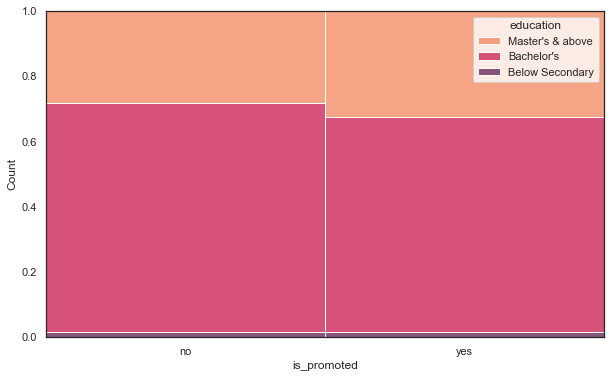

In [126]:
sns.histplot(x='is_promoted', hue = 'education', data = data, multiple = 'fill', palette = 'rocket_r', discrete=True)
plt.xticks([0,1], ['no', 'yes'])
pass

### Награды, эффективность и рейтинг

Что влияет на получение повышения у людей без высшего образования? 

Например, выигрыш наград, высокий коэффициент эффективности.

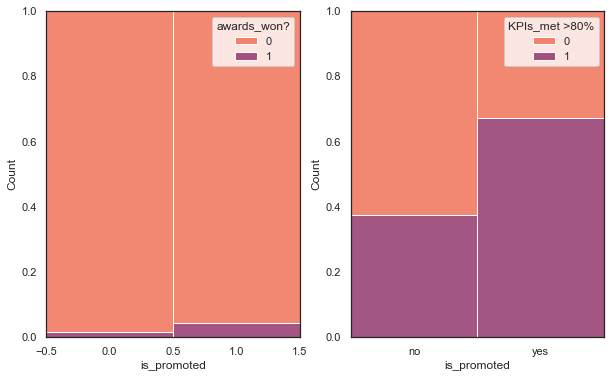

In [127]:
fig, ax =plt.subplots(1,2)
sns.histplot(x='is_promoted', hue = 'awards_won?', data = data[data['education'] == 'Below Secondary'], multiple = 'fill', palette = 'rocket_r', discrete=True, ax = ax[0])
plt.xticks([0,1], ['no', 'yes'])

sns.histplot(x='is_promoted', hue = 'KPIs_met >80%', data = data[data['education'] == 'Below Secondary'], multiple = 'fill', palette = 'rocket_r', discrete=True)
plt.xticks([0,1], ['no', 'yes'])
pass

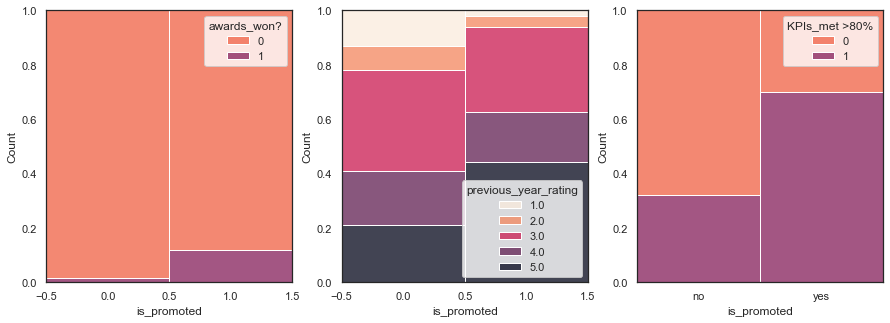

In [113]:
fig, ax =plt.subplots(1,3, figsize=(15, 5))
sns.histplot(x='is_promoted', hue = 'awards_won?', data = data, multiple = 'fill', palette = 'rocket_r', discrete=True, ax = ax[0])
plt.xticks([0,1], ['no', 'yes'])
sns.histplot(x='is_promoted', hue = 'previous_year_rating', data = data, multiple = 'fill', palette = 'rocket_r', discrete=True, ax = ax[1])
plt.xticks([0,1], ['no', 'yes'])
move_legend(ax[1], 'lower right')
sns.histplot(x='is_promoted', hue = data['KPIs_met >80%'], data = data, multiple = 'fill', palette = 'rocket_r', discrete=True)
plt.xticks([0,1], ['no', 'yes'])
pass

Если смотреть среди всех сотрудник, то и тут у тех, кого повысили, существенно выше доля выигрывавших награды и с высоким показателем эффективности.

### Пол человека и повышение
Влияет ли пол на повышение? 

Похоже, что нет. Среди всех, кого повысили лишь несущественно выше доля женщин.

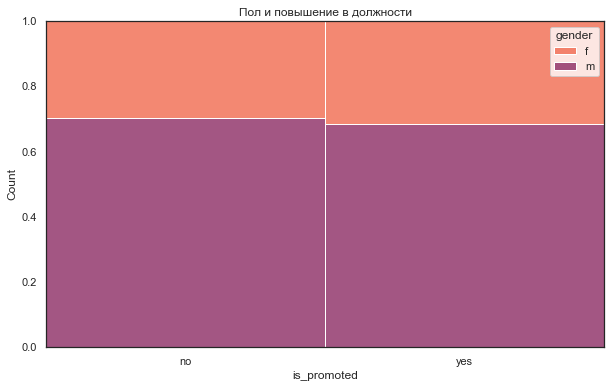

In [129]:
sns.histplot(x='is_promoted', hue = 'gender', data = data, multiple = 'fill', palette = 'rocket_r', discrete=True)
plt.xticks([0,1], ['no', 'yes'])
plt.title('Пол и повышение в должности')
pass

### Канал найма и повышение

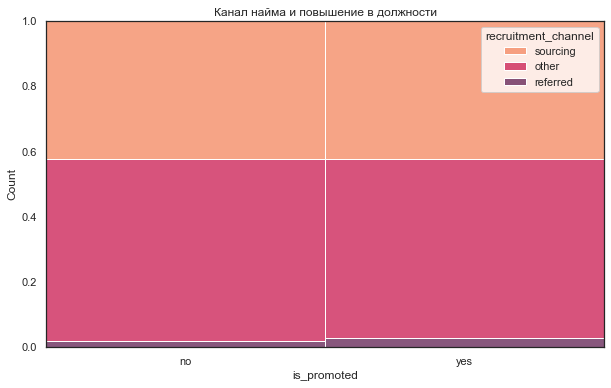

In [130]:
sns.histplot(x='is_promoted', hue = 'recruitment_channel', data = data, multiple = 'fill', palette = 'rocket_r', discrete=True)
plt.title('Канал найма и повышение в должности')
plt.xticks([0,1], ['no', 'yes'])
pass

Способ найма также не особо влияет на повышение в должности.

#### Два способа посчитать количество людей работающих в разных отделах

In [131]:
data.groupby('department')['employee_id'].count()

department
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
Operations           11348
Procurement           7138
R&D                    999
Sales & Marketing    16840
Technology            7138
Name: employee_id, dtype: int64

In [132]:
data['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

# Обработка данных

## 1. Заполнение пропущенных значений

In [133]:
data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [134]:
data.fillna(data.median(axis = 0), axis = 0, inplace = True)

In [135]:
data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [136]:
data['education'].fillna(data['education'].mode().iloc[0], inplace = True)

In [137]:
data.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

## 2. Обработка категориальных признаков

In [138]:
data.describe(include=['object'])

,department,region,education,gender,recruitment_channel
count,54808,54808,54808,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,39078,38496,30446


## gender

In [139]:
data['gender'] = pd.factorize(data['gender'])[0]

In [140]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,0,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,1,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,1,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,1,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,1,other,1,45,3.0,2,0,0,73,0


## department

In [141]:
dummies_departments = pd.get_dummies(data['department'])

In [142]:
dummies_departments.shape

(54808, 9)

In [143]:
dummies_departments.head()

,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1


In [144]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,0,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,1,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,1,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,1,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,1,other,1,45,3.0,2,0,0,73,0


In [145]:
data = pd.concat((data, dummies_departments), axis=1)
data = data.drop(['department'],  axis=1)

In [146]:
data.head()

,employee_id,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,...,is_promoted,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
0,65438,region_7,Master's & above,0,sourcing,1,35,5.0,8,1,...,0,0,0,0,0,0,0,0,1,0
1,65141,region_22,Bachelor's,1,other,1,30,5.0,4,0,...,0,0,0,0,0,1,0,0,0,0
2,7513,region_19,Bachelor's,1,sourcing,1,34,3.0,7,0,...,0,0,0,0,0,0,0,0,1,0
3,2542,region_23,Bachelor's,1,other,2,39,1.0,10,0,...,0,0,0,0,0,0,0,0,1,0
4,48945,region_26,Bachelor's,1,other,1,45,3.0,2,0,...,0,0,0,0,0,0,0,0,0,1


## region

In [147]:
dummies_region = pd.get_dummies(data['region'])
data = pd.concat((data, dummies_region), axis=1)
data = data.drop(['region'],  axis=1)

In [148]:
data.head()

,employee_id,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
0,65438,Master's & above,0,sourcing,1,35,5.0,8,1,0,...,0,0,0,0,0,0,0,1,0,0
1,65141,Bachelor's,1,other,1,30,5.0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7513,Bachelor's,1,sourcing,1,34,3.0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2542,Bachelor's,1,other,2,39,1.0,10,0,0,...,0,0,0,0,0,0,0,0,0,0
4,48945,Bachelor's,1,other,1,45,3.0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


## education

In [149]:
dummies_education = pd.get_dummies(data['education'])
data = pd.concat((data, dummies_education), axis=1)
data = data.drop(['education'],  axis=1)

In [150]:
data.head()

,employee_id,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,...,region_34,region_4,region_5,region_6,region_7,region_8,region_9,Bachelor's,Below Secondary,Master's & above
0,65438,0,sourcing,1,35,5.0,8,1,0,49,...,0,0,0,0,1,0,0,0,0,1
1,65141,1,other,1,30,5.0,4,0,0,60,...,0,0,0,0,0,0,0,1,0,0
2,7513,1,sourcing,1,34,3.0,7,0,0,50,...,0,0,0,0,0,0,0,1,0,0
3,2542,1,other,2,39,1.0,10,0,0,50,...,0,0,0,0,0,0,0,1,0,0
4,48945,1,other,1,45,3.0,2,0,0,73,...,0,0,0,0,0,0,0,1,0,0


## recruitment_channel	

In [151]:
dummies_recruitment_channel = pd.get_dummies(data['recruitment_channel'])
data = pd.concat((data, dummies_recruitment_channel), axis=1)
data = data.drop(['recruitment_channel'],  axis=1)

In [152]:
data.head()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_6,region_7,region_8,region_9,Bachelor's,Below Secondary,Master's & above,other,referred,sourcing
0,65438,0,1,35,5.0,8,1,0,49,0,...,0,1,0,0,0,0,1,0,0,1
1,65141,1,1,30,5.0,4,0,0,60,0,...,0,0,0,0,1,0,0,1,0,0
2,7513,1,1,34,3.0,7,0,0,50,0,...,0,0,0,0,1,0,0,0,0,1
3,2542,1,2,39,1.0,10,0,0,50,0,...,0,0,0,0,1,0,0,1,0,0
4,48945,1,1,45,3.0,2,0,0,73,0,...,0,0,0,0,1,0,0,1,0,0


## 3. Подготовка тестовой и тренировочной выборок

Обработку всех категориальных признаков можно сделать в одну строчку:

In [404]:
data = pd.read_csv('train.csv')
data.fillna(data.median(axis = 0), axis = 0, inplace = True)
data['education'].fillna(data['education'].mode().iloc[0], inplace = True)
#data = data.drop(['region'], axis = 1)
X = pd.get_dummies(data)
X.columns

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'department_Analytics',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_1', 'region_region_10', 'region_region_11',
       'region_region_12', 'region_region_13', 'region_region_14',
       'region_region_15', 'region_region_16', 'region_region_17',
       'region_region_18', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_27', 'region_region_28',
       'region_region_29', 'region_region_3', 'region_region_30',
       'region_region_31', 'region_region_32', 'region_region

In [405]:
X.isna().sum()

employee_id                     0
no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
KPIs_met >80%                   0
awards_won?                     0
avg_training_score              0
is_promoted                     0
department_Analytics            0
department_Finance              0
department_HR                   0
department_Legal                0
department_Operations           0
department_Procurement          0
department_R&D                  0
department_Sales & Marketing    0
department_Technology           0
region_region_1                 0
region_region_10                0
region_region_11                0
region_region_12                0
region_region_13                0
region_region_14                0
region_region_15                0
region_region_16                0
region_region_17                0
region_region_18                0
region_region_19                0
region_region_

In [406]:
X.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1,35,5.0,8,1,0,49,0,0,...,0,0,0,0,1,1,0,0,0,1
1,65141,1,30,5.0,4,0,0,60,0,0,...,0,0,1,0,0,0,1,1,0,0
2,7513,1,34,3.0,7,0,0,50,0,0,...,0,0,1,0,0,0,1,0,0,1
3,2542,2,39,1.0,10,0,0,50,0,0,...,0,0,1,0,0,0,1,1,0,0
4,48945,1,45,3.0,2,0,0,73,0,0,...,0,0,1,0,0,0,1,1,0,0


#### Заметим, что в данном случае метод 'one hot encoding' применяется и к бинарному признаку gender.

## 4. Разделение выборки на x и y

Выделяем столбец is_promoted - то что будем предсказывать

In [407]:
Y = X[['is_promoted']]
X = X.drop(['is_promoted'], axis=1)
print("x:", X.shape)
print("y:", Y.shape)

x: (54808, 59)
y: (54808, 1)


Воспользуемся стандартизацией данных - линейным преобразованием, приводящим все значения к нулевому среднему и единичному стандартному отклонению.

## 5.  Нормализация количественных признаков

In [408]:
X=(X-X.mean())/X.std()

## 6. Отбор признаков
Признак employee id не несет никакой содержательной информации для решаемой задачи, поэтому его можно исключить из тренировочной и тестовой выборок, предварительно сохранив в отдельную переменную

In [409]:
emp_id = X['employee_id']
X = X.drop(['employee_id'], axis = 1)
X.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_region_34', 'reg

Есть основания полагать, что регион не должен сильно влиять на повышение человека, т.к. в большую роль играют индивидуальные достижения, образование и стаж работы. Поэтому для предсказания это может оказаться лишним признаком. Отдельно проведем эксперемент с данными без региона работы, для удобства отбросим регионы после разделения на тестоую и обучающие выборки.

## 7. Разделение выборки на тренировочную и тестовую

In [410]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 17)
print("x_train: ", x_train.shape)
print("x_test ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (43846, 58)
x_test  (10962, 58)
y_train:  (43846, 1)
y_test:  (10962, 1)


In [411]:
x_no_reg_train = x_train.copy()
x_no_reg_test = x_test.copy()
for i in range(1, 35):
    x_no_reg_train = x_no_reg_train.drop([f'region_region_{i}'], axis = 1)
    x_no_reg_test = x_no_reg_test.drop([f'region_region_{i}'], axis = 1)

# Построение предсказательных моделей

## 1. k ближайших соседей

In [412]:
acc = pd.DataFrame({'size':[],'train_accuracy':[],'test_accuracy':[]})
for i in range(1,13,2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train.values.ravel())
    acc  = acc.append({'size':i,'train_accuracy':knn.score(x_train, y_train),
                                 'test_accuracy':knn.score(x_test, y_test)},ignore_index=True)
print(acc)

   size  train_accuracy  test_accuracy
0   1.0        0.999795       0.884966
1   3.0        0.937189       0.905127
2   5.0        0.927017       0.910874
3   7.0        0.923528       0.912972
4   9.0        0.921338       0.914340
5  11.0        0.920038       0.914614


[[0.9952048  0.0047952 ]
 [0.93277311 0.06722689]]


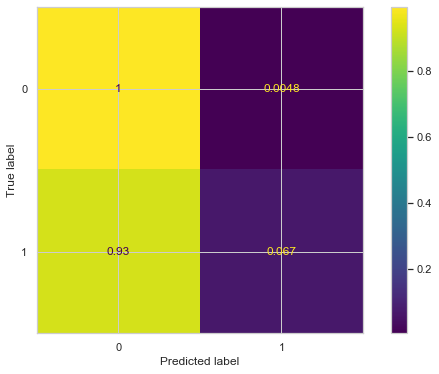

In [413]:
# k = 11
plot_confusion_matrix(knn, x_test, y_test, normalize='true')
print(confusion_matrix(y_test,knn.predict(x_test),normalize='true'))
pass

Общая точность достаточно высокая, однако это достигается за счет почти 100% предсказания не повышений. Повышения же предсказываются правильно лишь в 6% случаев. В данной задаче необходимо найти некоторую "золотую середину", при которой будут одновременно минимальными шансы предсказать повышение сотрудника, который не должен быть повышен(таких большинство, а должностей для повышения ограниченнное колиечество) и максимальными предсказать правильное повышение, чтобы был выбран подходящий человек.

### Эксперимент с данными без учета регионов

In [414]:
# Эксперимент с данными без учета регионов
accuracy = pd.DataFrame({'size':[],'train_accuracy':[],'test_accuracy':[]})
for i in range(1,13,2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_no_reg_train, y_train.values.ravel())
    accuracy  = accuracy.append({'size':i,'train_accuracy':knn.score(x_no_reg_train, y_train),
                                 'test_accuracy':knn.score(x_no_reg_test, y_test)},ignore_index=True)
print(accuracy)

   size  train_accuracy  test_accuracy
0   1.0        0.996282       0.895457
1   3.0        0.945423       0.913884
2   5.0        0.934566       0.918993
3   7.0        0.931145       0.920909
4   9.0        0.928454       0.922186
5  11.0        0.927131       0.920544


[[0.9961039  0.0038961 ]
 [0.87394958 0.12605042]]


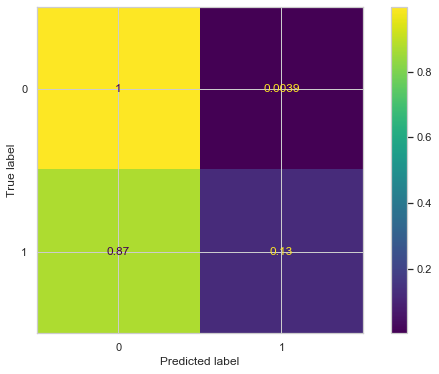

In [415]:
plot_confusion_matrix(knn, x_no_reg_test, y_test, normalize='true')
print(confusion_matrix(y_test,knn.predict(x_no_reg_test),normalize='true'))
pass

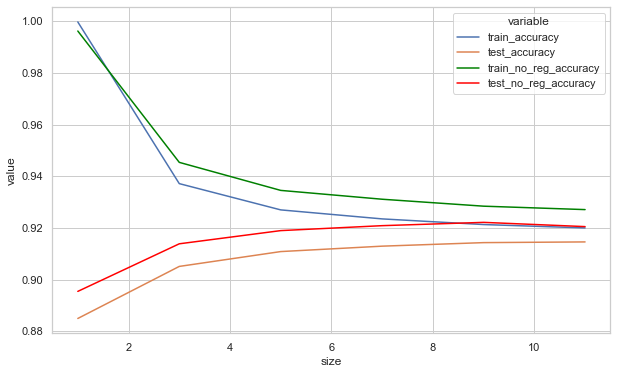

In [416]:
sns.set_style("whitegrid")
sns.lineplot(x = 'size', y = 'value', hue = 'variable', data=pd.melt(acc, ['size']))
accuracy.columns = ['size', 'train_no_reg_accuracy', 'test_no_reg_accuracy']
sns.lineplot(x = 'size', y = 'value', hue = 'variable', data=pd.melt(accuracy, ['size']), palette = ['green', 'red'])
pass

Общая точность классификатора при удалении регионов возросла, предположение о незначимости региона оказалось верным. Но по прежнему предсказания повышения достаточно низкие - всего 11%

## 2. Случайный лес

In [417]:
rfc = RandomForestClassifier() # class_weight='balanced'
rfc.fit(x_train, y_train.values.ravel())
print("Train Accuracy :", rfc.score(x_train, y_train))
print("Test Accuracy :", rfc.score(x_test, y_test))

Train Accuracy : 0.9997947361218811
Test Accuracy : 0.9326765188834154


[[0.99480519 0.00519481]
 [0.72058824 0.27941176]]


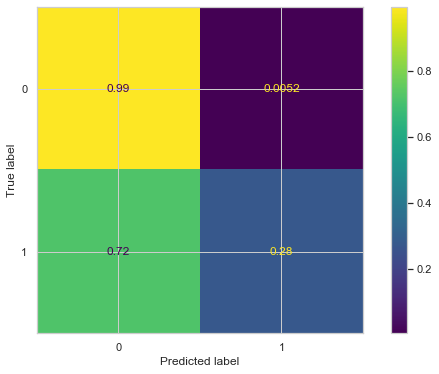

In [418]:
plot_confusion_matrix(rfc, x_test, y_test, normalize='true')
print(confusion_matrix(y_test, rfc.predict(x_test),normalize='true'))
pass

Случайный лес дает точность лучше, чем kNN с числом соседей от 1 до 11. При сохранении почти 100% правильности предсказания не повышения, точность предсказания повышения значительно повысилась с 6% до 27%

### Эксперимент с данными без учета регионов

In [419]:
# Эксперимент с данными без учета регионов
rfc = RandomForestClassifier() #class_weight='balanced'
rfc.fit(x_no_reg_train, y_train.values.ravel())
print("Train Accuracy :", rfc.score(x_no_reg_train, y_train))
print("Test Accuracy :", rfc.score(x_no_reg_test, y_test))

Train Accuracy : 0.9965105140719792
Test Accuracy : 0.931125706987776


[[0.98701299 0.01298701]
 [0.65651261 0.34348739]]


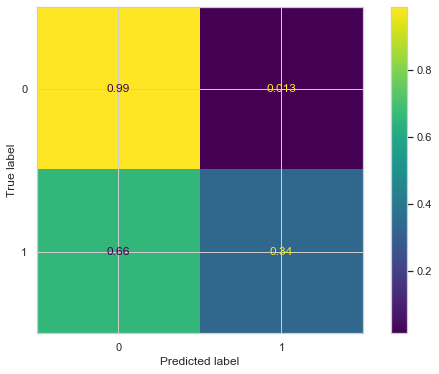

In [420]:
plot_confusion_matrix(rfc, x_no_reg_test, y_test, normalize='true')
print(confusion_matrix(y_test, rfc.predict(x_no_reg_test),normalize='true'))
pass

Опять же, точность классификатора без регионов выше. Вместо 11% повышений, теперь предсказывается 32%.

## 3. SVM

In [421]:
# default rbf kernel - Radial basis function kernel
clf = svm.SVC() # class_weight='balanced'
clf.fit(x_train, y_train.values.ravel())
print("Train Accuracy :", clf.score(x_train, y_train))
print("Test Accuracy :", clf.score(x_test, y_test))

Train Accuracy : 0.9298909820736213
Test Accuracy : 0.9258347016967706


[[9.99100899e-01 8.99100899e-04]
 [8.44537815e-01 1.55462185e-01]]


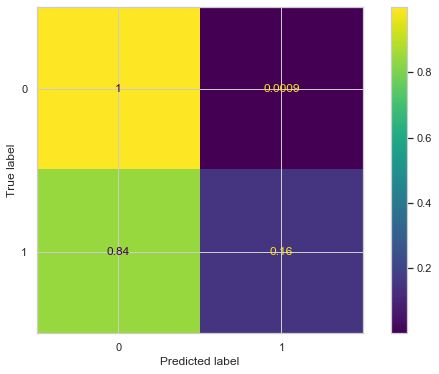

In [422]:
plot_confusion_matrix(clf, x_test, y_test, normalize='true')
print(confusion_matrix(y_test,clf.predict(x_test),normalize='true'))
pass

SVM классификатор показал среднюю точность, лучше KNN, но хуже, чем random forest. При этом точнее стало предсказываться не повышение.

### Эксперимент с данными без учета регионов

In [423]:
clf.fit(x_no_reg_train, y_train.values.ravel())
print("Train Accuracy :", clf.score(x_no_reg_train, y_train))
print("Test Accuracy :", clf.score(x_no_reg_test, y_test))

Train Accuracy : 0.9358664416366373
Test Accuracy : 0.9334063127166575


[[9.99100899e-01 8.99100899e-04]
 [7.57352941e-01 2.42647059e-01]]


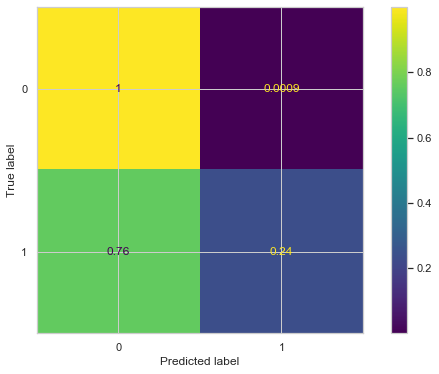

In [424]:
plot_confusion_matrix(clf, x_no_reg_test, y_test, normalize='true')
print(confusion_matrix(y_test, clf.predict(x_no_reg_test),normalize='true'))
pass

Без учета регионов, SVM классификатор также показал среднюю точность, но выросла точность предсказания повышения с 16% до 24%

**Поскольку, было определено, что без учета регионов, точность предсказания вырастает, все дальнейшие эксперименты будут проводиться без регионов**

## 4. Борьба с несбалансированными классами

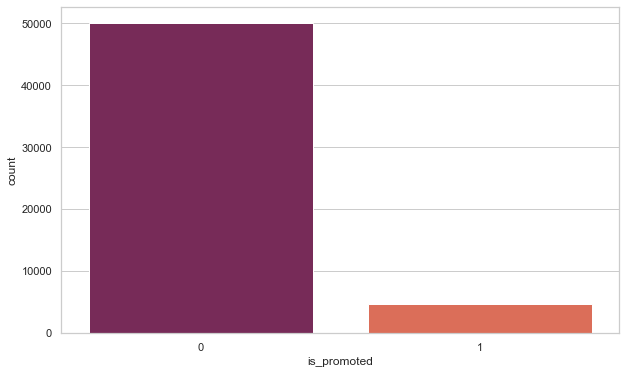

In [425]:
sns.countplot(x = 'is_promoted', data = Y, palette = 'rocket')
pass

In [426]:
x_ext, y_ext = SMOTE().fit_sample(x_no_reg_train, y_train.values.ravel())
x_ext = pd.DataFrame(x_ext)
y_ext = pd.DataFrame(y_ext)
print("x extended :", x_ext.shape)
print("y extended :",y_ext.shape)

x extended : (80260, 24)
y extended : (80260, 1)


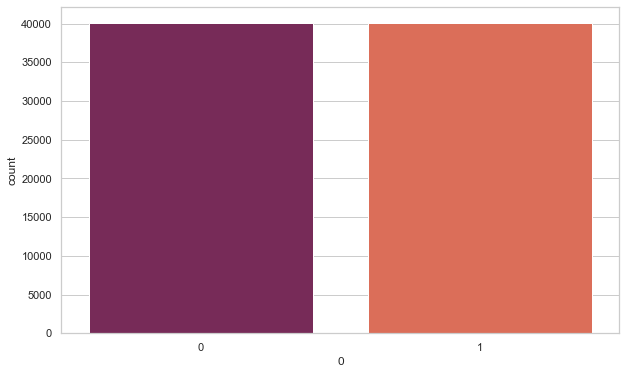

In [427]:
sns.countplot(x = 0, data = y_ext, palette = 'rocket')
pass

In [431]:
acc_ext = pd.DataFrame({'size':[],'train_accuracy':[],'test_accuracy':[]})
for i in range(1,13,2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_ext, y_ext.values.ravel())
    acc_ext  = acc_ext.append({'size':i,'train_accuracy':knn.score(x_ext, y_ext),
                                 'test_accuracy':knn.score(x_no_reg_test, y_test)},ignore_index=True)
print(acc_ext)

   size  train_accuracy  test_accuracy
0   1.0        0.997969       0.866083
1   3.0        0.956466       0.837895
2   5.0        0.934675       0.821839
3   7.0        0.919848       0.808612
4   9.0        0.909855       0.798030
5  11.0        0.901184       0.789911


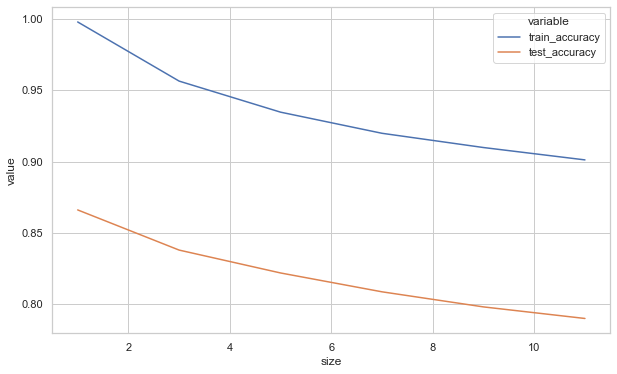

In [432]:
sns.lineplot(x='size', y='value', hue='variable', data=pd.melt(acc_ext, ['size']))
pass

[[0.7993007  0.2006993 ]
 [0.30882353 0.69117647]]


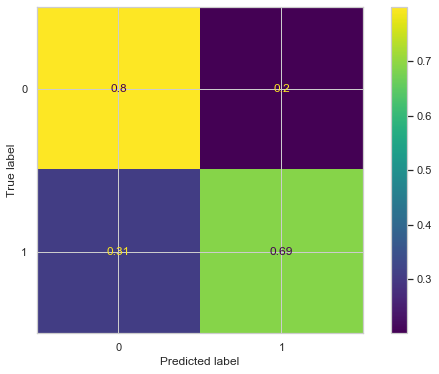

In [433]:
plot_confusion_matrix(knn, x_no_reg_test, y_test, normalize='true')
print(confusion_matrix(y_test,knn.predict(x_no_reg_test),normalize='true'))
pass

На сбалансированном датасете kNN классификатор показал общую точность хуже, чем на несбалансированным. Предсказания не повышений упали с почти 100% до 79%. Точность предсказания повышений поднялась с 11% до 66%.

Train Accuracy : 0.9981186145028657
Test Accuracy : 0.911421273490239
[[0.95774226 0.04225774]
 [0.57563025 0.42436975]]


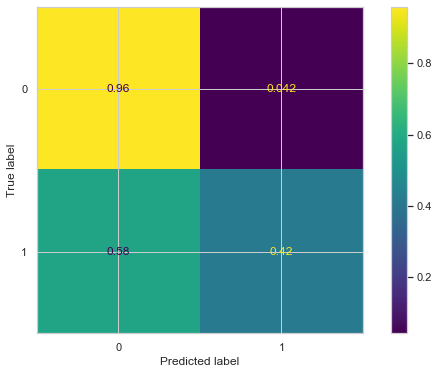

In [434]:
rfc = RandomForestClassifier()
rfc.fit(x_ext, y_ext.values.ravel())
print("Train Accuracy :", rfc.score(x_ext, y_ext))
print("Test Accuracy :", rfc.score(x_no_reg_test, y_test))
plot_confusion_matrix(rfc, x_no_reg_test, y_test, normalize='true')
print(confusion_matrix(y_test, rfc.predict(x_no_reg_test),normalize='true'))
pass

Случайный лес на сбалансированном датасете показывает себя лучше, чем kNN. Точность предсказаний повышений возросла с 32% до 42%

Train Accuracy : 0.8407550461001745
Test Accuracy : 0.7413793103448276
[[0.72607393 0.27392607]
 [0.09768908 0.90231092]]


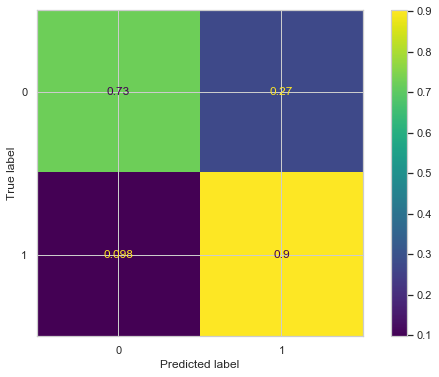

In [435]:
clf = svm.SVC()
clf.fit(x_ext, y_ext.values.ravel())
print("Train Accuracy :", clf.score(x_ext, y_ext))
print("Test Accuracy :", clf.score(x_no_reg_test, y_test))
plot_confusion_matrix(clf, x_no_reg_test, y_test, normalize='true')
print(confusion_matrix(y_test, clf.predict(x_no_reg_test),normalize='true'))
pass

SVM на сбалансированном датасете дает высокую точность предсказания повышения 87%

``Применим сбалансированные random forest и svm к исходным данным:``

Train Accuracy : 0.9960543721206039
Test Accuracy : 0.9304871373836892
[[0.98721279 0.01278721]
 [0.66596639 0.33403361]]


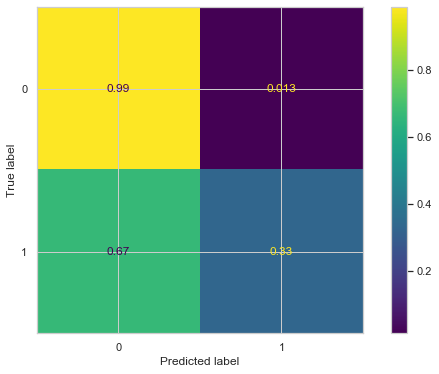

In [436]:
rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(x_no_reg_train, y_train.values.ravel())
print("Train Accuracy :", rfc.score(x_no_reg_train, y_train))
print("Test Accuracy :", rfc.score(x_no_reg_test, y_test))
plot_confusion_matrix(rfc, x_no_reg_test, y_test, normalize='true')
print(confusion_matrix(y_test, rfc.predict(x_no_reg_test),normalize='true'))
pass

Train Accuracy : 0.7219358664416367
Test Accuracy : 0.7242291552636381
[[0.7042957  0.2957043 ]
 [0.06617647 0.93382353]]


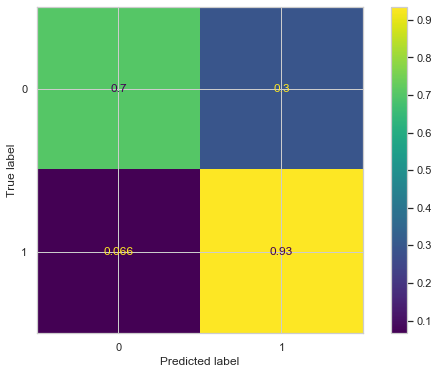

In [437]:
clf = svm.SVC(class_weight='balanced')
clf.fit(x_no_reg_train, y_train.values.ravel())
print("Train Accuracy :", clf.score(x_no_reg_train, y_train))
print("Test Accuracy :", clf.score(x_no_reg_test, y_test))
plot_confusion_matrix(clf, x_no_reg_test, y_test, normalize='true')
print(confusion_matrix(y_test, clf.predict(x_no_reg_test),normalize='true'))
pass

На исходном датасете сбалансированный SVM классификатор дает 92 % точность предсказания повышения и 71% точности определения не повышения. Общая точность 72%.

# Выводы

### kNN
Классификатор kNN работает долго на имеющейся конфигурации ПК и данных размером 100 тысяч элементов. Обладает следующей точностью:

- 1 сосед 
  - Train accuracy : 99.986 %
  - Test accuracy : 88.29 %
- 3 соседа
  - Train accuracy : 93.8 %
  - Test accuracy : 90.35 %
- 11 соседей
  - Train accuracy : 92.05 %
  - Test accuracy : 91.38 %
  
Точность на обучающей выборке для 1 соседа самая высокая - при вычислении одного ближайшего соседа на той же самой выборке, на которой проходило обучение, классификатор выберет этот же самый элемент, то есть в теории на уникальных данных точность должна составлять 100 %. Точность 99.986 % на обучающей выборке говорит о том, что есть одинаковые данные, принадлежащие разным классам. На тестовой самую высокую точность показал алгоритм, который классифицировал по 11 соседям.
  
### Случайный лес
Классификатор случайный лес дал на тренировочной выборке точность 99.98 %, на тестовой точность составила 93.34 %, что выше, чем у всех протестированных версий алгоритма kNN. 

Данную модель можно использовать не только для предсказания того, был ли сотрудник повышен в должности, но и определять, кого могут повысить в перспективе. 

# PCA

## PCA с 2 компонентами

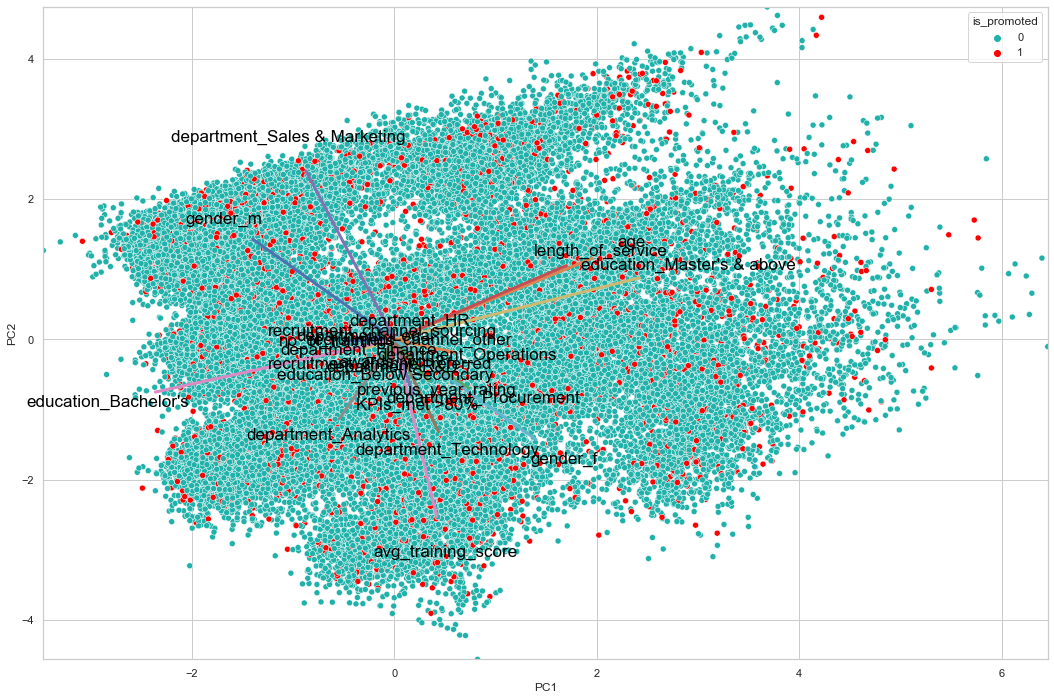

In [439]:
def biplot(X,y, comp, labels):
    plt.figure(figsize=(18,12))
    draw = pd.concat([X, y], axis=1, join='inner')
    #np.random.seed(15)
    #random_subset = np.random.choice(np.arange(draw.shape[0]), size=20000, replace=False)#//*=draw.iloc[random_subset]*//
    sns.scatterplot(data = draw, x = 'PC1',y ='PC2', hue='is_promoted',alpha=1.0, 
                    palette= ['lightseagreen', 'red'])
    plt.ylim(bottom = X["PC2"].min(), top = X["PC2"].max())
    plt.xlim(left = X["PC1"].min(), right =X["PC1"].max())
    for i in range(0,len(comp[0])):
        plt.text(comp[0,i]*6, comp[1,i]*6, labels[i], color = 'black', ha = 'center', va = 'center',  fontsize=17)
        plt.plot( [0, comp[0,i]*5], [0, comp[1,i]*5], linewidth = 3)
        
        
pca = PCA(n_components = 2)
X_no_reg = x_no_reg_train.copy()
X_no_reg = X_no_reg.append(x_no_reg_test)
pca_x = pca.fit_transform(X_no_reg)
pca_x = pd.DataFrame(pca_x, columns = ['PC1','PC2'])
#x_tr, x_te, y_tr, y_te = train_test_split(res, y, test_size = 0.25, random_state = 22)

biplot(pca_x, Y, pca.components_, X_no_reg.columns)

Самыми важными признаками оказались
- education
- department
- gender ?
- age
- lengh_of_service
- KPIs_met > 80%

Train Accuracy : 0.9914854279180655
Test Accuracy : 0.900598452780616
[[0.98450479 0.01549521]
 [0.98815567 0.01184433]]


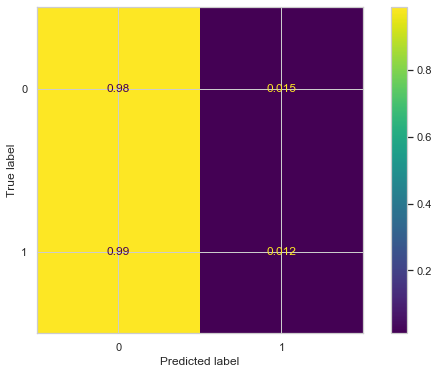

In [440]:
rfc = RandomForestClassifier(class_weight='balanced')
x_tr, x_te, y_tr, y_te = train_test_split(pca_x, Y, test_size = 0.25, random_state = 17)
rfc.fit(x_tr, y_tr.values.ravel())
print("Train Accuracy :", rfc.score(x_tr, y_tr))
print("Test Accuracy :", rfc.score(x_te, y_te))
plot_confusion_matrix(rfc, x_te, y_te, normalize='true')
print(confusion_matrix(y_te, rfc.predict(x_te),normalize='true'))
pass

## Зависимость точности классификатора от количества компонент

In [441]:
acc_pca = pd.DataFrame({'size':[],'train_accuracy_pca':[],'test_accuracy_pca':[]})
rfc = RandomForestClassifier(class_weight='balanced')
for i in range(24, 0, -1):
    pca = PCA(n_components=i)
    pca_x = pca.fit_transform(X_no_reg)
    #pca_test_x = pca.transform(x_no_reg_test)
    #pca_x = pd.DataFrame(pca_x)
    #pca_test_x = pd.DataFrame(pca_test_x)
    x_tr, x_te, y_tr, y_te = train_test_split(pca_x, Y, test_size = 0.25, random_state = 17)
    rfc.fit(x_tr, y_tr.values.ravel())
    #rfc.fit(pca_x, y_ext.values.ravel())
    acc_pca  = acc_pca.append({'size':i,'train_accuracy_pca':rfc.score(x_tr, y_tr),
                                 'test_accuracy_pca':rfc.score(x_te, y_te)},ignore_index=True)

print(acc_pca)

    size  train_accuracy_pca  test_accuracy_pca
0   24.0            0.991388           0.902715
1   23.0            0.991315           0.903372
2   22.0            0.991315           0.903007
3   21.0            0.991485           0.904102
4   20.0            0.991339           0.903153
5   19.0            0.991412           0.901547
6   18.0            0.991315           0.900890
7   17.0            0.991315           0.900890
8   16.0            0.991291           0.900890
9   15.0            0.991339           0.901912
10  14.0            0.991169           0.901474
11  13.0            0.991388           0.902204
12  12.0            0.991193           0.901693
13  11.0            0.991218           0.901474
14  10.0            0.991534           0.901985
15   9.0            0.991242           0.901985
16   8.0            0.991291           0.903153
17   7.0            0.991315           0.903810
18   6.0            0.991339           0.904612
19   5.0            0.991485           0

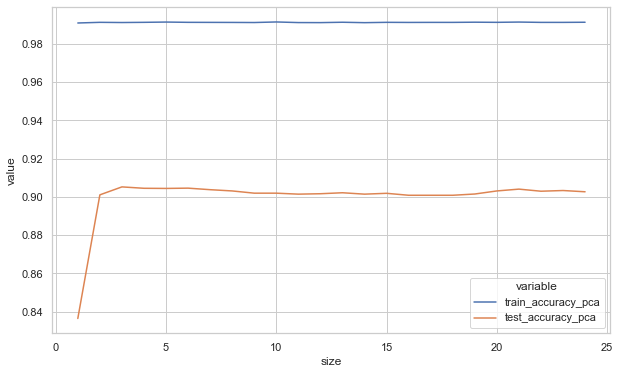

In [442]:
sns.lineplot(x='size', y='value', hue='variable', data=pd.melt(acc_pca, ['size']))
pass

In [443]:
np.isinf(x_ext).any()
np.isnan(x_ext).any()

no_of_trainings                 False
age                             False
previous_year_rating            False
length_of_service               False
KPIs_met >80%                   False
awards_won?                     False
avg_training_score              False
department_Analytics            False
department_Finance              False
department_HR                   False
department_Legal                False
department_Operations           False
department_Procurement          False
department_R&D                  False
department_Sales & Marketing    False
department_Technology           False
education_Bachelor's            False
education_Below Secondary       False
education_Master's & above      False
gender_f                        False
gender_m                        False
recruitment_channel_other       False
recruitment_channel_referred    False
recruitment_channel_sourcing    False
dtype: bool

In [444]:
lda = LinearDiscriminantAnalysis(n_components = 1)
lda_x = lda.fit_transform(X_no_reg, Y.values.ravel())
x_tr, x_te, y_tr, y_te = train_test_split(lda_x, Y, test_size = 0.25, random_state = 17)

In [445]:
rfc = RandomForestClassifier()
rfc.fit(x_tr, y_tr.values.ravel())
print("Train Accuracy :", rfc.score(x_tr, y_tr))
print("Test Accuracy :", rfc.score(x_te, y_te))

Train Accuracy : 0.9924341945214811
Test Accuracy : 0.8498029484746752
